### Что делать
Построить 5 графиков по выбранным данным. 
Графики должны быть различных видов и использовать хотя бы 3 из рассмотренных на занятии библиотек. 
Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import warnings
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot

warnings.simplefilter('ignore')
init_notebook_mode(connected=True)
%matplotlib inline

Взял датасет по фильмам https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')

Пишу несколько функций, чтобы собрать из данных нужную информацию

In [3]:
def year_from_date(row, col):
    try:
        date = datetime.strptime(row[col], '%Y-%m-%d')
        return int(datetime.strftime(date, '%Y'))
    except:
        return 1900
    
    
def month_from_date(row, col):
    try:    
        date = datetime.strptime(row[col], '%Y-%m-%d')
        return datetime.strftime(date, '%B')
    except:
        return 'January'


def genre_is(row, col, genre1, genre2):  
    if genre1.lower() in row[col].lower() and genre2.lower() in row[col].lower():
        return genre1 + ' & ' + genre2
    elif genre1.lower() in row[col].lower():
        return genre1
    elif genre2.lower() in row[col].lower():
        return genre2
    else:
        return 'Other'
    
def financial_success_rate(row):
    try:
        fs = row['revenue'] / row['budget']
        return fs
    except:
        return 0

In [4]:
movies['release_year'] = movies.apply(year_from_date, col='release_date', axis=1)
movies['release_month'] = movies.apply(month_from_date, col='release_date', axis=1)
movies['genre'] = movies.apply(genre_is, col='genres', genre1='Action', genre2='Drama', axis=1)
movies['success_rate'] = movies.apply(financial_success_rate, axis=1)

In [5]:
columns = ['release_year',
           'release_month',
           'budget',
           'revenue',
           'success_rate',
           'runtime',
           'vote_average',
           'vote_count',
           'popularity',
           'original_language',
           'genre']
movies = movies[columns]

Сформировал предобработанный датасет - с ним и будем работать

In [6]:
movies.head(10)

,release_year,release_month,budget,revenue,success_rate,runtime,vote_average,vote_count,popularity,original_language,genre
0,2009,December,237000000,2787965087,11.763566,162.0,7.2,11800,150.437577,en,Action
1,2007,May,300000000,961000000,3.203333,169.0,6.9,4500,139.082615,en,Action
2,2015,October,245000000,880674609,3.594590,148.0,6.3,4466,107.376788,en,Action
3,2012,July,250000000,1084939099,4.339756,165.0,7.6,9106,112.312950,en,Action & Drama
4,2012,March,260000000,284139100,1.092843,132.0,6.1,2124,43.926995,en,Action
5,2007,May,258000000,890871626,3.452991,139.0,5.9,3576,115.699814,en,Action
6,2010,November,260000000,591794936,2.276134,100.0,7.4,3330,48.681969,en,Other
7,2015,April,280000000,1405403694,5.019299,141.0,7.3,6767,134.279229,en,Action
8,2009,July,250000000,933959197,3.735837,153.0,7.4,5293,98.885637,en,Other
9,2016,March,250000000,873260194,3.493041,151.0,5.7,7004,155.790452,en,Action


### Начнем с библиотеки Seaborn.
Подготовим датасет и посмотрим как распределены оценки пользователей в зависимости от жанра фильма

In [7]:
#выбираем фильмы с ненулевыми оценками 
genres = movies[movies['vote_average'] != 0]

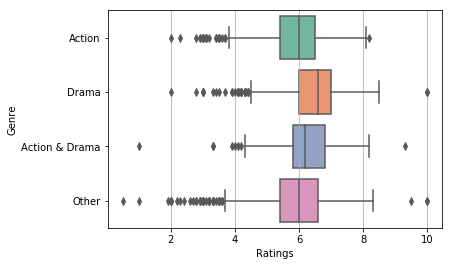

In [8]:
#строим boxplot и видим, что людям больше нравится плакать, нежели наслаждаться экшеном
fig, ax = plt.subplots()
sns.boxplot(x = 'vote_average',
            y = 'genre', 
            data = genres, 
            orient = 'h', 
            order = ['Action', 'Drama', 'Action & Drama', 'Other'],
            palette="Set2", 
            ax=ax).set(
                xlabel='Ratings', 
                ylabel='Genre')
ax.xaxis.grid(True)
plt.show()

Проверим существует ли зависимость между успешностью фильма в прокате и рейтингами пользователей

In [9]:
#Исследуем данные и уберем нулевые значения исследуемых признаков, а также чересчур успешные фильмы
movies.describe()

,release_year,budget,revenue,success_rate,runtime,vote_average,vote_count,popularity
count,4803.000000,4.803000e+03,4.803000e+03,4.803000e+03,4801.000000,4803.000000,4803.000000,4803.000000
mean,2002.447429,2.904504e+07,8.226064e+07,1.986492e+03,106.875859,6.092172,690.217989,21.492301
std,12.500808,4.072239e+07,1.628571e+08,1.234915e+05,22.611935,1.194612,1234.585891,31.816650
min,1900.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1999.000000,7.900000e+05,0.000000e+00,0.000000e+00,94.000000,5.600000,54.000000,4.668070
50%,2005.000000,1.500000e+07,1.917000e+07,1.046593e+00,103.000000,6.200000,235.000000,12.921594
75%,2011.000000,4.000000e+07,9.291719e+07,3.157066e+00,118.000000,6.800000,737.000000,28.313505
max,2017.000000,3.800000e+08,2.787965e+09,8.500000e+06,338.000000,10.000000,13752.000000,875.581305


In [10]:
votes_success = movies[(movies['vote_average'] != 0) & (movies['success_rate'] != 0) & (movies['success_rate'] < 5)]

Text(0.5,0.98,'Rating and success rate distribution')

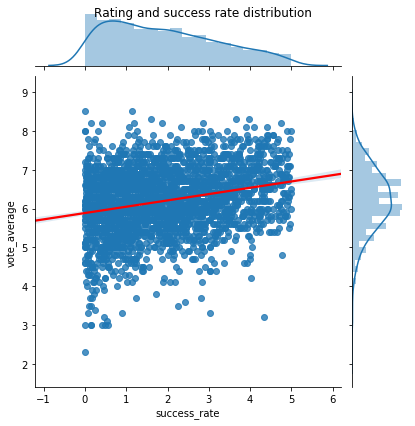

In [49]:
#Строим график с линейной регрессией и распределением каждой переменной. 
#Наблюдаем, что есть некая связь - людям нравится фильм и они платят за него деньги
plot_success = sns.jointplot(data=votes_success, x = 'success_rate', y = 'vote_average', kind='reg')
regline = plot_success.ax_joint.get_lines()[0]
regline.set_color('red')
plot_success.fig.suptitle('Rating and success rate distribution')

### Теперь поработаем с Plotly.
Посмотрим как распределены релизы фильмов по месяцам. Используя возможности plotly добавим в фильтры данных жанры фильмов.

In [52]:
# Выберем все жанры
genres = movies['genre'].unique().tolist()
# Остальные строки здесь, чтобы заставить плотли отображать месяцы релиза в нужном порядке
# Сделать это через tickmode у меня не получилось :(
months =  {'January':1, 'February':2, 'March':3,
           'April':4, 'May':5, 'June':6, 
           'July':7, 'August':8, 'September':9, 
           'October':10, 'November':11, 'December':12}
months_order = movies['release_month'].map(months)
months_order.name = 'month_num'
plotly_df = pd.concat([movies,months_order], axis = 1)
plotly_df = plotly_df.sort_values(by='month_num')

In [13]:
traces = []
for genre in genres:
    traces.append(
        go.Histogram(
            x=plotly_df[plotly_df['genre'] == genre].release_month,
            histnorm='probability', 
            name = genre, 
            visible = (genre == 'Action'))
    )
    
layout = go.Layout(
    title='Film releases distribution',
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            yanchor='top',
            buttons=list([
                dict(
                    args=['visible', [True] + [False]*3],
                    label='Action',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False] + [True] + [False]*2],
                    label='Action & Drama',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*2 + [True] + [False]],
                    label='Other',
                    method='restyle'
                ),
                dict(
                    args=['visible', [False]*3 + [True]],
                    label='Drama',
                    method='restyle'
                )
            ]),
        )
    ]),
)

fig = {'data': traces, 'layout': layout}
iplot(fig, show_link=False)

In [14]:
# Как видно на гистограмме, кинокомпании склонны выпускать экшн фильмы летом, а драмы - осенью

### Построим пару простых графиков в Matplotlib
Посмотрим как ведут себя графики бюджетов и сборов по фильмам в разрезе годов выпуска

In [15]:
matplot_df = movies[(movies['budget'] != 0) & (movies['revenue'] != 0)].sort_values('release_year').groupby('release_year').sum()
matplot_df.head()

,budget,revenue,success_rate,runtime,vote_average,vote_count,popularity
release_year,,,,,,,
1916,385907,8394751,21.753301,197.0,7.4,60,3.232447
1925,245000,22000000,89.795918,151.0,7.0,21,0.785744
1927,92620000,650422,0.007022,153.0,8.0,657,32.351527
1929,379000,4358000,11.498681,100.0,5.0,19,0.968865
1930,3950000,8000000,2.025316,127.0,6.1,19,8.484123


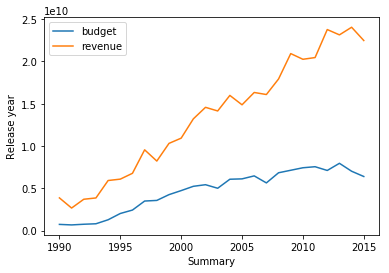

In [16]:
matplot_df[['budget','revenue']].loc[1990:2015].plot()
plt.xlabel('Summary')
plt.ylabel('Release year')
plt.show()

In [17]:
# Как видно из графика, киноиндустрия неуклонно росла в 20 и 21 веке.
# При этом темпы роста бюджетов значительно ниже чем сборы в прокате.

Попробуем построить heatmap

In [35]:
import numpy as np
heatmap_df = plotly_df[plotly_df['vote_average']!=0].pivot_table(index='genre', 
                        columns='month_num', 
                        values='vote_average', 
                        aggfunc=np.mean).applymap(float)

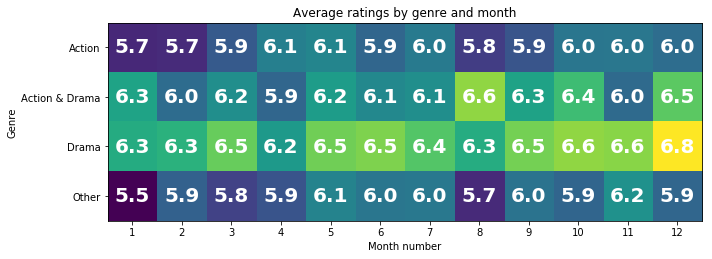

In [47]:
months = heatmap_df.index.tolist()
genres = heatmap_df.columns.tolist()
ratings = heatmap_df.values.tolist()

fig, ax = plt.subplots(figsize=(10, 5))
im = ax.imshow(ratings)

ax.set_xticks(np.arange(len(genres)))
ax.set_yticks(np.arange(len(months)))

ax.set_xticklabels(genres)
ax.set_yticklabels(months)
plt.xlabel('Month number')
plt.ylabel('Genre')

plt.setp(ax.get_xticklabels(), rotation=0, ha="center",
         rotation_mode="anchor")

for i in range(len(months)):
    for j in range(len(genres)):
        text = ax.text(j, i, round(ratings[i][j], 1),
                       ha="center", va="center", color="w", fontsize=20, fontweight='bold')

ax.set_title("Average ratings by genre and month")
fig.tight_layout()
plt.show()

In [53]:
# Как видно из heatmap'а люди склонны ставить аномально высокие оценки драмам под новый год:)

### Вывод:
Учитывая, что зрители выше оценивают драмы, и пик оценок приходится на декабрь - людям нравится смотреть новогодние драмы.

Зная, что чем выше рейтинг фильма, тем выше его индекс успешности картины (сборы / бюджет), делаем вывод, что декабрь наиболее удачный для выпуска драм месяц.

Однако, исторический анализ показывает, что пик релизов драм приходится на сентябрь.

Это надо исправлять:
1. Берем инвесторов, сценариста и режиссера.
2. Пишем новогоднюю драму
3. Запускаем ее в кино числах в 25-30 декабря
4. ...
5. Profit